<a href="https://colab.research.google.com/github/RovisLab/Course_AI/blob/main/Lab_02_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from torch import optim

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 4
learning_rate = 0.001
num_epochs = 10

In [3]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms,
    download = True,
)
val_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transforms
)

dataloader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



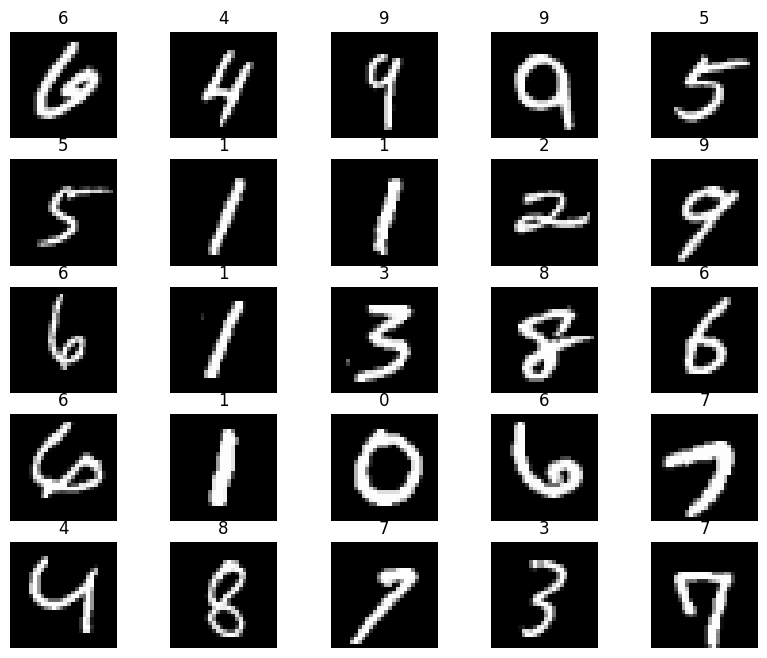

In [6]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [9]:
model = LeNet()
model = model.to(device)

In [11]:
def predict():
    for idx in range(2):
        sample = next(iter(dataloader_val))
        imgs, labels = sample
        imgs, labels = imgs.to(device), labels.to(device)
        pred = model(imgs)
        pred = pred.argmax(dim=1, keepdim=True)
        print("Target: ", labels[0], "; Prediction = ", pred[0])

        plt.title(labels[0].item())
        plt.imshow(imgs[0].cpu().squeeze(), cmap="gray")
        plt.show()

Target:  tensor(0) ; Prediction =  tensor([3])


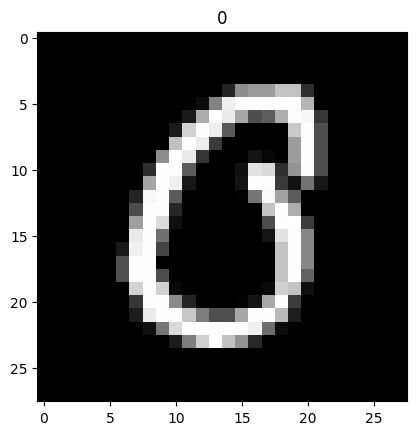

Target:  tensor(0) ; Prediction =  tensor([3])


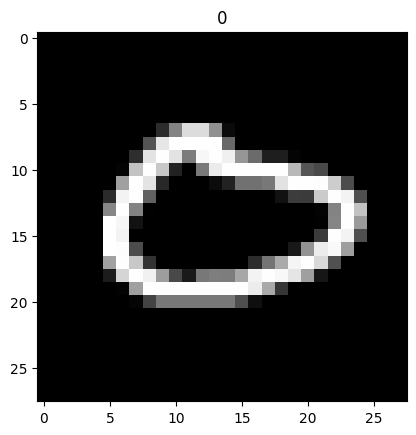

In [12]:
model.eval()
predict()

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for i, (images, labels) in enumerate(dataloader_train):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss = loss.item()
        if i % 100 == 0:
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, i, len(dataloader_train), train_loss))

Epoch [0/10], Batch [0/3750], Loss: 0.1716
Epoch [0/10], Batch [100/3750], Loss: 0.2115
Epoch [0/10], Batch [200/3750], Loss: 0.9016
Epoch [0/10], Batch [300/3750], Loss: 0.0998


KeyboardInterrupt: ignored

In [13]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for i, (images, labels) in enumerate(dataloader_train):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if i % 100 == 0:
            print('Epoch [{}/{}], Batch [{}/{}], Loss: {:.4f}'.format(epoch, num_epochs, i, len(dataloader_train), train_loss))
            train_loss = 0
# torch.save(model.state_dict(), 'LeNet.pt')

Epoch [0/10], Batch [0/15000], Loss: 2.2761
Epoch [0/10], Batch [100/15000], Loss: 175.3635
Epoch [0/10], Batch [200/15000], Loss: 74.9100
Epoch [0/10], Batch [300/15000], Loss: 63.2026
Epoch [0/10], Batch [400/15000], Loss: 49.3462


KeyboardInterrupt: ignored

Target:  tensor(9) ; Prediction =  tensor([9])


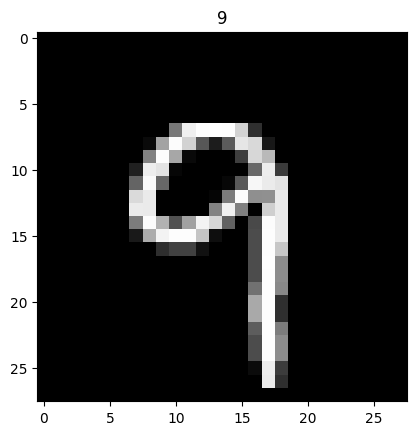

Target:  tensor(4) ; Prediction =  tensor([4])


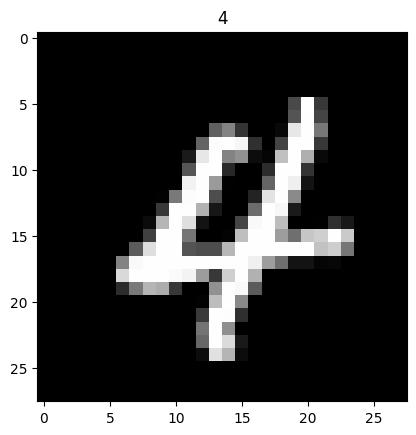

In [15]:
# state_dict = torch.load('LeNet.pt')
# model.load_state_dict(state_dict)
model.eval()
predict()